In [5]:
import time, json, glob, os
from py2neo import Graph, Node, Relationship
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline

In [6]:
graph = Graph( "bolt://matlaber10.media.mit.edu:7687", auth=('neo4j','myneo'))
print("Connected to graph database with {:,} nodes and {:,} relationships!".format(
    graph.database.primitive_counts['NumberOfNodeIdsInUse'], 
    graph.database.primitive_counts['NumberOfRelationshipIdsInUse']))

Connected to graph database with 278,590,931 nodes and 1,844,902,937 relationships!


In [7]:
def query_to_df(query, graph):
    print("Starting query...", end=" ")
    query_start_time = time.time()
    df = graph.run(query).to_data_frame()
    print("Done ({:.2f} minutes).".format((time.time()-query_start_time)/60))
    return df
    
top_5 = ['Cell', 'Nature', 'Nature Biotechnology','Proceedings of the National Academy of Sciences of the United States of America','Science']
top_10 = ['Cell', 'Nature', 'Nature Biotechnology','Proceedings of the National Academy of Sciences of the United States of America','Science', 'Journal of the American Chemical Society', 'JAMA', 'The New England Journal of Medicine', 'Nature Genetics', 'Neuron']
top_42 = ['Angewandte Chemie','Blood','Cancer Cell','Cancer Discovery','Cancer Research','Cell','Cell Host & Microbe','Cell Metabolism','Cell Stem Cell','Chemistry & Biology','The EMBO Journal','Genes & Development','Immunity','Journal of Neurology','Journal of the American Chemical Society','JAMA','Journal of Biological Chemistry','Journal of Cell Biology','Journal of Clinical Investigation','Journal of Experimental Medicine','Journal of Medicinal Chemistry','The Lancet','Nature Cell Biology','Nature Chemical Biology','Nature Chemistry','Nature Medicine','Nature Methods','Nature','Nature Biotechnology','The New England Journal of Medicine','Neuron','Nature Genetics','Nature Immunology','Nature Neuroscience','Nature Structural & Molecular Biology','PLOS Biology','PLOS Genetics','PLOS Pathogens','Proceedings of the National Academy of Sciences of the United States of America','Science Signaling','Science Translational Medicine','Science']

In [44]:
query = """
MATCH (q:Quanta)
WHERE q.venue in {} AND exists(q.Disruption)
RETURN 
    q.id, q.Disruption as disruption
""".format(top_42)
df = query_to_df(query, graph)

Starting query... Done (2.33 minutes).


In [45]:
df.shape

(832820, 2)

Problem 1: ~200,000 values are >1, mostly because of miscalculation, all computations at the end

Fix: recompute given q.i, q.j, q.k

In [46]:
df[df['disruption']>1].shape

(245687, 2)

In [47]:
df.sort_values('disruption', ascending=False)

,disruption,q.id
824824,722862.000000,86fb6dd0-34b9-4e9c-bfc7-ea1bdd74e732
810563,659965.000000,b72c4d29-cbd4-4e48-80e1-5bcdad5ce779
800148,621285.000000,5ae3db38-45fb-4e1c-bffa-9a73f045f663
812511,600572.000000,cec0792c-13c5-42ae-99c2-2fecdc23c0e3
822489,590140.000000,6883a11a-88f7-4c49-ab02-24fe8b4fb8e9
768581,589369.000000,0d4d44dd-f803-444b-b278-d2414f1f60d9
794013,587256.000000,0337a7db-167c-4904-9fe3-acb4d9a169c6
814766,577119.000000,eb5c5975-6d04-437d-ab9e-9528263f0c41
795599,571218.000000,054f61fa-d219-41cf-a644-b36ef85a42d6
793734,570105.000000,1bb2c7c5-ef2d-4f6d-aa3c-b01d0cc5bde5


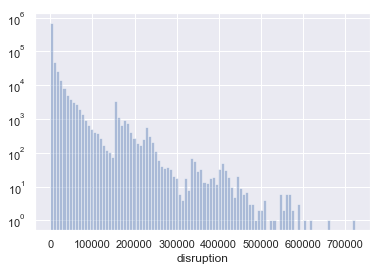

In [48]:
col = 'disruption'
df_plot = df[pd.notna(df[col])]
ax = sns.distplot(df_plot[[col]], kde = False, axlabel = col, bins = 100)
ax.set_yscale('log')
plt.show()

In [35]:
query = """
MATCH (q:Quanta)
WHERE q.venue in {} AND exists(q.Disruption)
RETURN 
    q.id, q.Disruption as disruption
    LIMIT 200000
""".format(top_42)
df_test = query_to_df(query, graph)

Starting query... Done (0.53 minutes).


In [43]:
df_test[df_test['disruption']>1].shape

(0, 2)

In [36]:
df_test.sort_values('disruption', ascending=False)

,disruption,q.id
1569,0.998155,ec486889-6495-4966-a953-682dc62463af
68863,0.996011,500d9a21-1d33-427c-b2a1-120a1202d344
132773,0.993902,6ab622c7-c265-417c-8329-8e2a8a1d9ce4
130912,0.993127,5b575cbc-f1b9-4940-a5bc-4186578b92f7
88410,0.991857,8084054f-4fa2-412a-9842-7ec9022840cd
131781,0.991150,61cd7786-9ce3-4183-af84-feaac9ad0d87
34808,0.990881,e1c86b98-eb3d-46db-a597-3220817c3c8b
122152,0.989899,f8f0db6c-2877-4547-8b34-74d1497f1efd
65739,0.989691,48e0cec9-e878-47e3-816b-96cc515df825
116130,0.989276,c7c3c27a-91f9-45a4-a1e8-d729535924b5


c:\python36\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


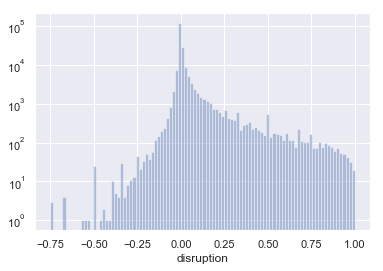

In [37]:
col = 'disruption'
df_plot = df_test[pd.notna(df[col])]
ax = sns.distplot(df_plot[[col]], kde = False, axlabel = col, bins = 100)
ax.set_yscale('log')
plt.show()

In [49]:
query = """
MATCH (q:Quanta)
WHERE q.venue in {} AND exists(q.Disruption)
RETURN 
    q.id, q.Disruption as disruption
""".format(top_42)
df = query_to_df(query, graph)

Starting query... Done (0.66 minutes).


Problem 2: some j are null and weren't recalculated

Fix: set these j to 0 and recalculate

In [55]:
print(df.shape)
print(df[df['disruption']>1].shape)
print(df.sort_values('disruption', ascending=False))

(832820, 2)
(2836, 2)
        disruption                                  q.id
591994    226637.0  5fc122f6-0d45-42a5-88a4-32b71e365618
616976    206615.0  5e585b46-3edd-4a0b-8385-8e912e29ecd6
716469     92634.0  c2fe317d-1af1-4ed6-933a-f057bf5427bb
762574     81954.0  68e99cac-5a2c-417d-9f4b-98fe4cef65bf
795711     70970.0  2e0efe43-43a5-4bcc-a92d-c652f4e560e1
751917     65855.0  487b95a0-89b9-4486-9908-78eb9a9ca378
608128     60512.0  9726cef2-6e87-451c-aa50-3924317588b3
737312     47582.0  1c0ef290-cc91-4ea1-8d14-00d318e803d9
704684     41209.0  9ebaefcd-e3f7-42f1-935a-19f91d72dad4
727513     39309.0  e46a3ed4-c5de-4bc1-b1da-aac88f33bd6d
778315     36547.0  99074bd3-69f0-4924-bfe1-19ade7e47cdb
631401     36017.0  deaa0ec3-5a3f-4325-95d4-5986cc0150b1
586719     34926.0  4e37be99-9bc2-4b6b-8a03-9e39a83d612e
740281     33736.0  24289fc8-e426-477e-9723-7da53bcad253
656245     32709.0  723287ef-3533-46a5-9e15-331795a9e0cd
748547     31061.0  07734272-21c9-4df1-b4b5-baddccc85d71
587213   

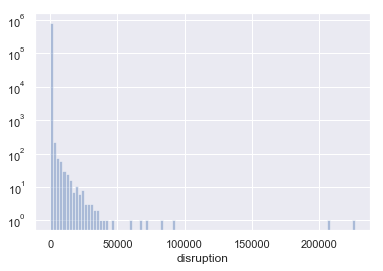

In [53]:
col = 'disruption'
df_plot = df[pd.notna(df[col])]
ax = sns.distplot(df_plot[[col]], kde = False, axlabel = col, bins = 100)
ax.set_yscale('log')
plt.show()

In [58]:
query = """
MATCH (q:Quanta)
WHERE q.venue in {} AND exists(q.Disruption)
RETURN 
    q.id, q.Disruption as disruption
""".format(top_42)
df = query_to_df(query, graph)

Starting query... Done (0.41 minutes).


Fixed! ~600 still have divide by 0 errors, but this means their disruption is actualy undefined. (.07% of samples)

In [60]:
print(df.shape)
print(df[df['disruption']>1].shape)
print(df.sort_values('disruption', ascending=False))

(832126, 2)
(0, 2)
        disruption                                  q.id
652307         1.0  61b92ed1-add1-4ca2-8c21-681740d48b48
650365         1.0  5933bc89-82b0-4897-876c-ab313da1f355
625555         1.0  bf61bd18-01c7-4282-9754-06a5070dbfda
712513         1.0  b83350c2-c0f5-4af0-90d4-011e16934582
655324         1.0  70084f01-2c72-4cd2-9958-ceff55b169f9
625245         1.0  bdb21bbe-c3ed-47ba-a3ad-581e864bedff
624988         1.0  bc1a2a60-cbcd-41a1-8258-1b82a0c366be
658862         1.0  82ca1615-bfa3-4368-879b-06ba884c8ad4
656476         1.0  76ece82b-80dc-471d-8146-73a38be02c7a
637196         1.0  1b4d6134-2eec-49bd-b800-67cdd952cc8e
654106         1.0  0ad5fa1e-fde9-4fbd-b7df-dd643fb6deff
624932         1.0  bba923bd-e4fd-42a1-b224-88c9ce706adb
624793         1.0  bac19cdd-3ace-439c-9d54-df5e256678f7
648256         1.0  4e15008a-e636-4d59-ba5e-753acb86b897
637013         1.0  1a85b7f2-b8d0-4848-971e-349b8cff1409
650346         1.0  59244f4b-8b07-4201-8a60-31528694f9ed
648321      

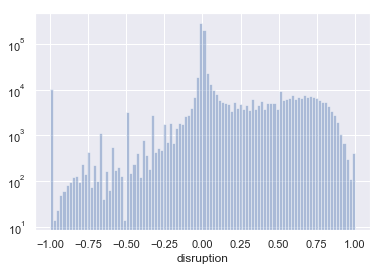

In [61]:
col = 'disruption'
df_plot = df[pd.notna(df[col])]
ax = sns.distplot(df_plot[[col]], kde = False, axlabel = col, bins = 100)
ax.set_yscale('log')
plt.show()